In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


In [4]:
df = pd.read_csv('data/data.csv')

In [5]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [10]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
print("Categories in 'gender' variable:   ",end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:   ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in 'parental_level_of_education' variable:   ",end=" ")
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:   ",end=" ")
print(df['lunch'].unique())

print("Categories in 'test_preparation_course' variable:   ",end=" ")
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:    ['female' 'male']
Categories in 'race_ethnicity' variable:    ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:    ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:    ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:    ['none' 'completed']


In [16]:
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

print('We have {} numerical features: {}'.format(len(numeric_features), numeric_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [17]:
df['total_score']= df['math_score'] + df['reading_score'] + df['writing_score']
df['average_score']= df['total_score']/3
df.head()


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [18]:
reading_full = df[df['reading_score'] == 100]['average_score'].count()
writing_full = df[df['writing_score'] == 100]['average_score'].count()
math_full = df[df['math_score'] == 100]['average_score'].count()

print(f'Number of students with full marks in Mths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Mths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [19]:
math_less_20 = df[df['math_score']<= 20]['average_score'].count()
reading_less_20 = df[df['reading_score'] <= 20]['average_score'].count()
writing_less_20 = df[df['writing_score'] <= 20]['average_score'].count()

print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Maths: {math_less_20}')

Number of students with less than 20 marks in Reading: 1
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Maths: 4


Insights

- From above values we get students have performed the wrost in Maths 
- Best performance is in reading section

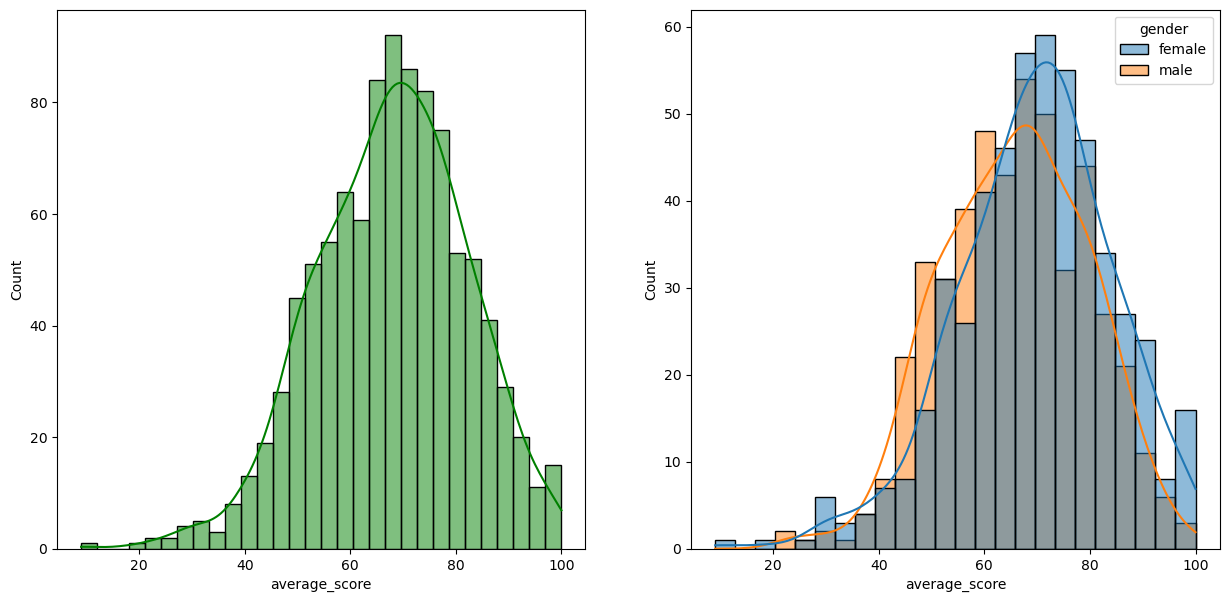

In [24]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='average_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average_score',kde=True,hue='gender')
plt.show()

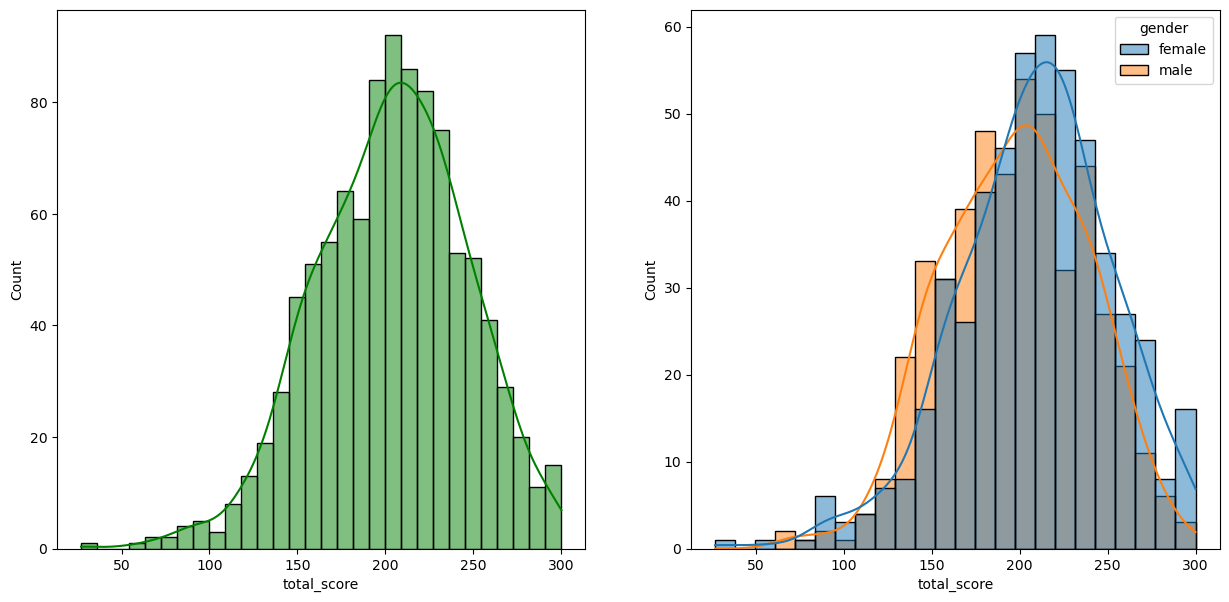

In [25]:
fig, axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

Female tend to perform well then male

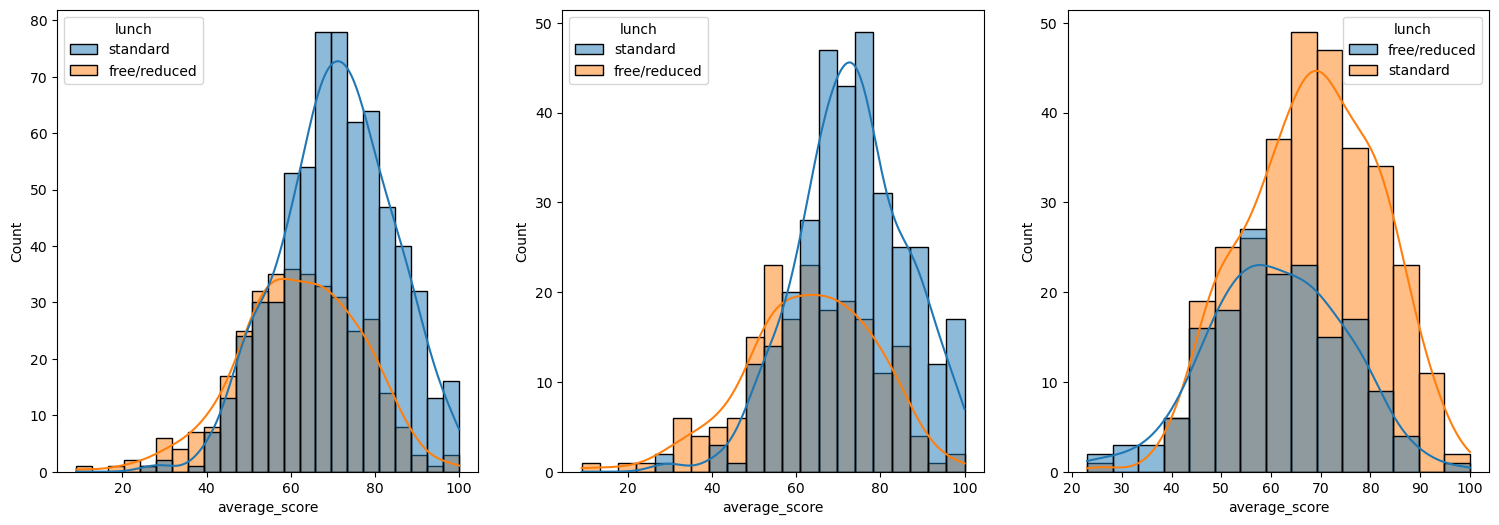

In [27]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

- standard lunch helps the student perform well in exams.
- standard lunch helps perform well in exams be it a male or a female

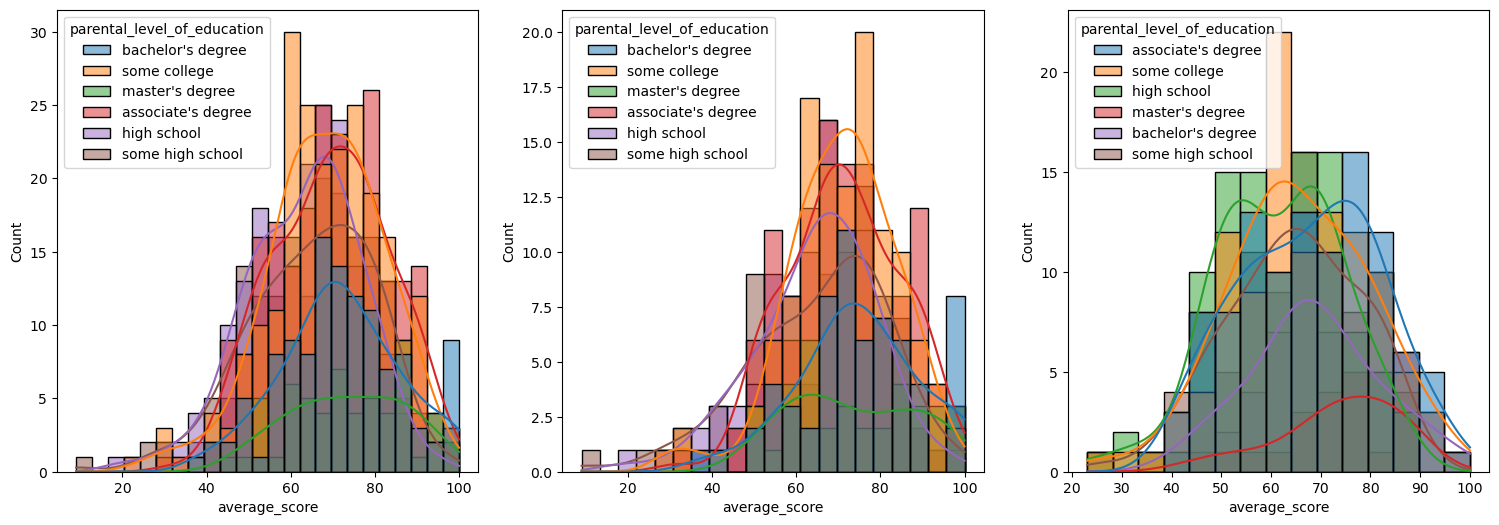

In [29]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='parental_level_of_education')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='parental_level_of_education')
plt.show()

- In general parent's education dont't help student to perform well in exm.
- 3rd plot shows that parent's whose education is of associate's degree or master's degree thair male child's examination
- 2nd plot we can see there is no effect of parent's education on female students. 

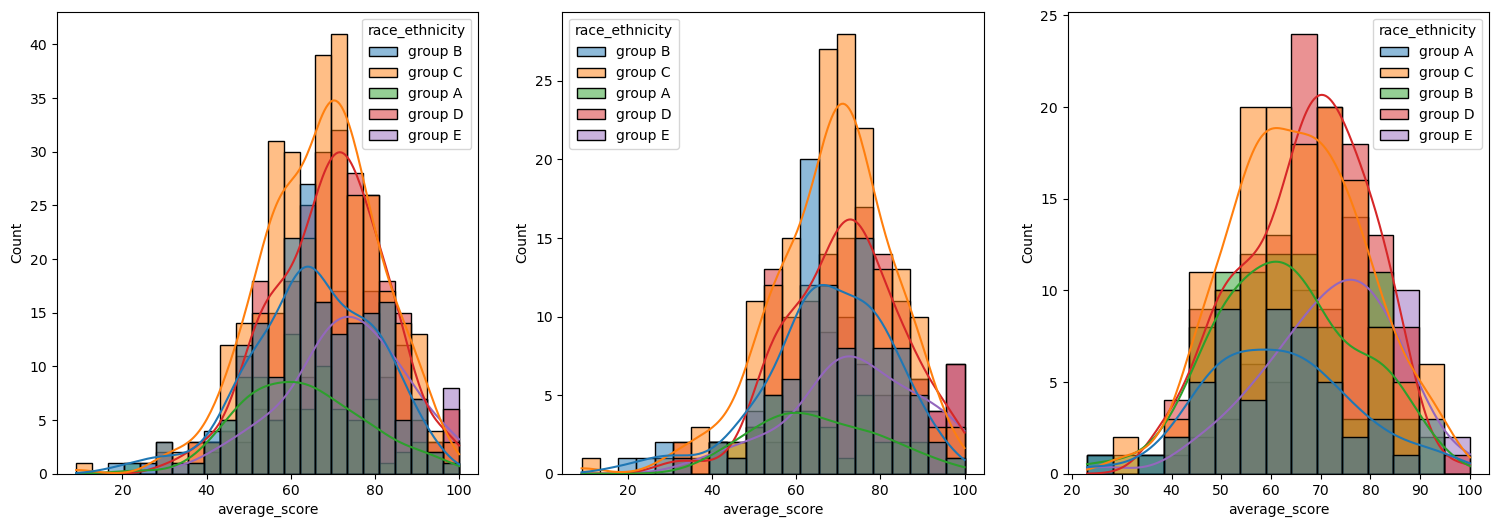

In [30]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='race_ethnicity')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='race_ethnicity')
plt.show()

- Students of group A and group B tends to perform poorly in exams
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

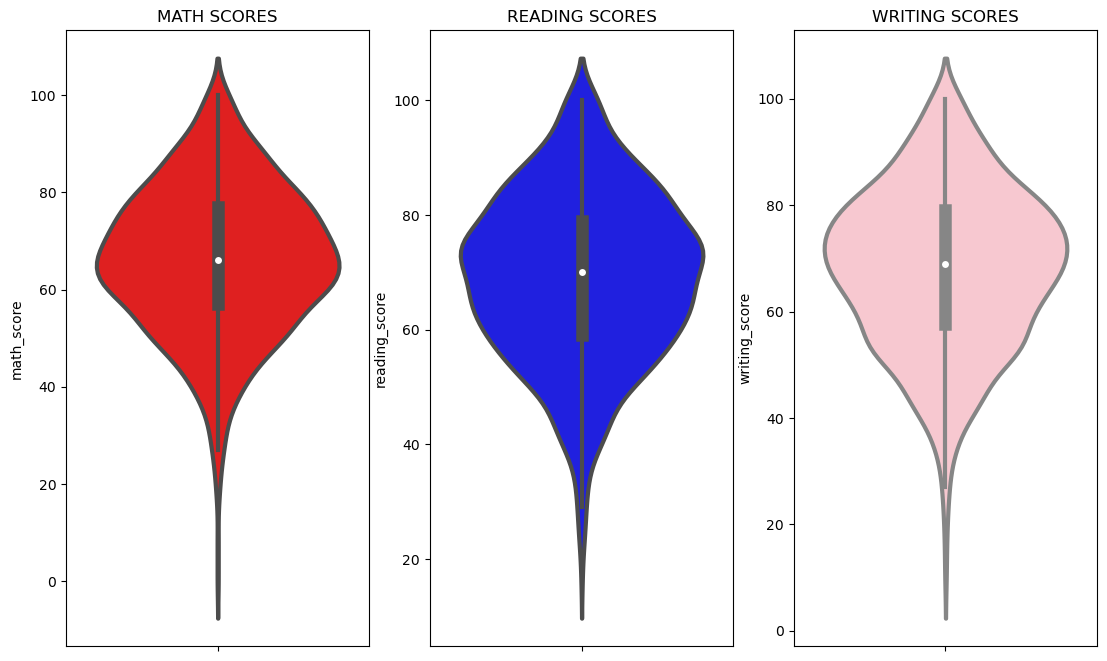

In [34]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('MATH SCORES')
sns.violinplot(y='math_score',data=df,color='red',linewidth=3)
plt.subplot(1,4,2)
plt.title('READING SCORES')
sns.violinplot(y='reading_score',data=df,color='blue',linewidth=3)
plt.subplot(1,4,3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing_score',data=df,color='pink',linewidth=3)
plt.show()

- From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

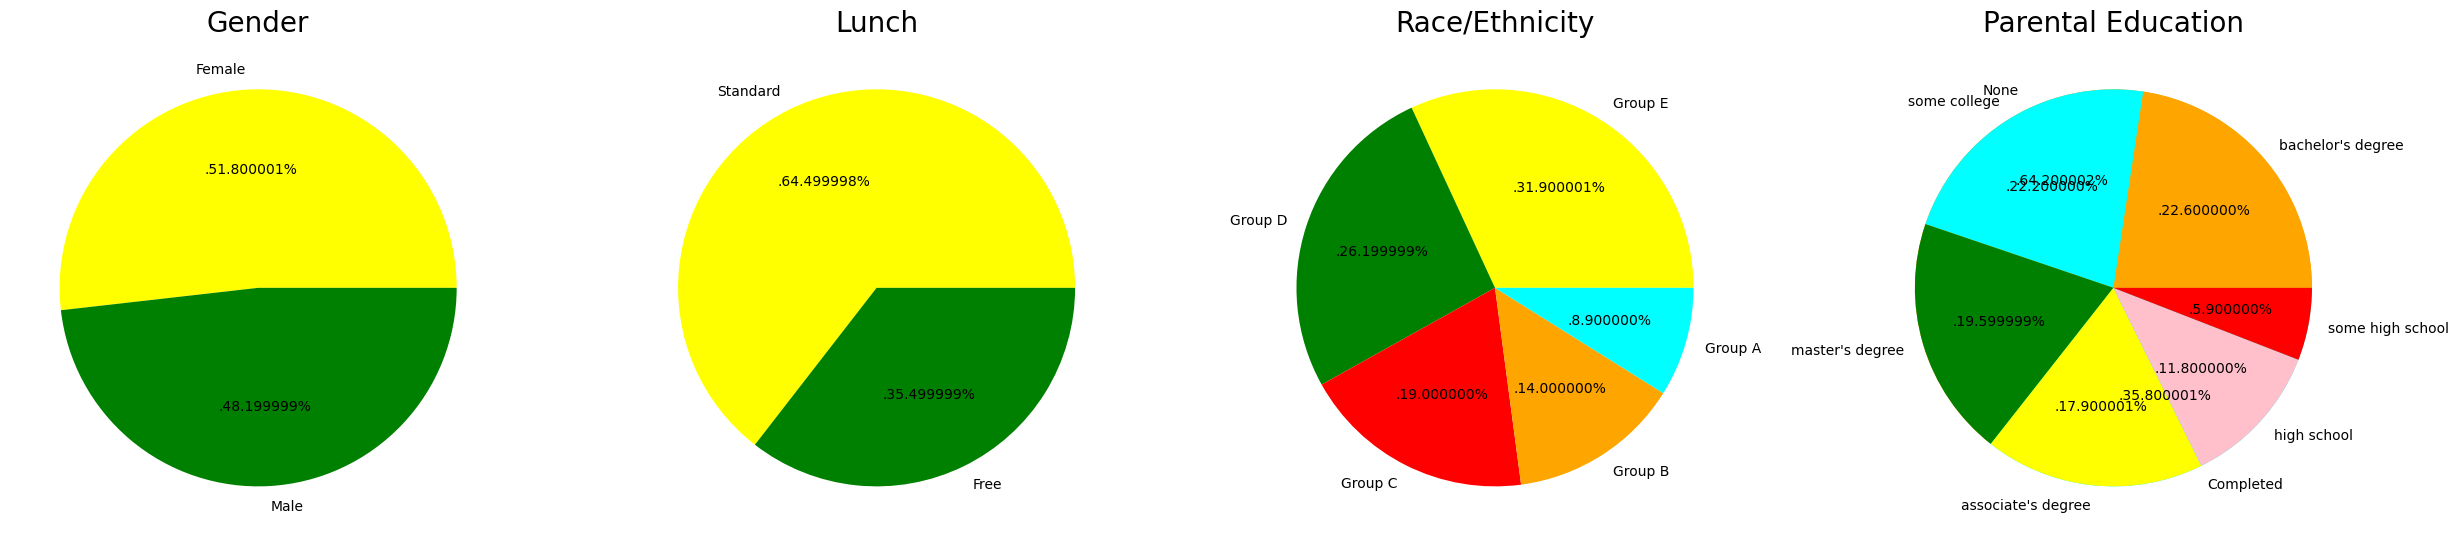

In [36]:
plt.rcParams['figure.figsize'] = (30,12)

#Gender
plt.subplot(1,5,1)
size= df['gender'].value_counts()
labels = 'Female' , 'Male'
color = ['yellow','green']

plt.pie(size,colors=color,labels=labels,autopct= '.%2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')

#lunch
plt.subplot(1,5,2)
size= df['lunch'].value_counts()
labels = 'Standard' , 'Free'
color = ['yellow','green']

plt.pie(size,colors=color,labels=labels,autopct= '.%2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')

#Race
plt.subplot(1,5,3)
size= df['race_ethnicity'].value_counts()
labels = 'Group E' , 'Group D','Group C', 'Group B' , 'Group A'
color = ['yellow','green','red','orange','cyan']

plt.pie(size,colors=color,labels=labels,autopct= '.%2f%%')
plt.title('Race/Ethnicity', fontsize=20)
plt.axis('off')

#Test preparation
plt.subplot(1,5,4)
size= df['test_preparation_course'].value_counts()
labels = 'None' , 'Completed'
color = ['orange','cyan']

plt.pie(size,colors=color,labels=labels,autopct= '.%2f%%')
plt.title('Test Preparation Course', fontsize=20)
plt.axis('off')

#Parental education
plt.subplot(1,5,4)
size= df['parental_level_of_education'].value_counts()
labels = ["bachelor's degree" ,'some college', "master's degree", "associate's degree"
 ,'high school' ,'some high school']
color = ['orange','cyan','green','yellow','pink','red']

plt.pie(size,colors=color,labels=labels,autopct= '.%2f%%')
plt.title('Parental Education', fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

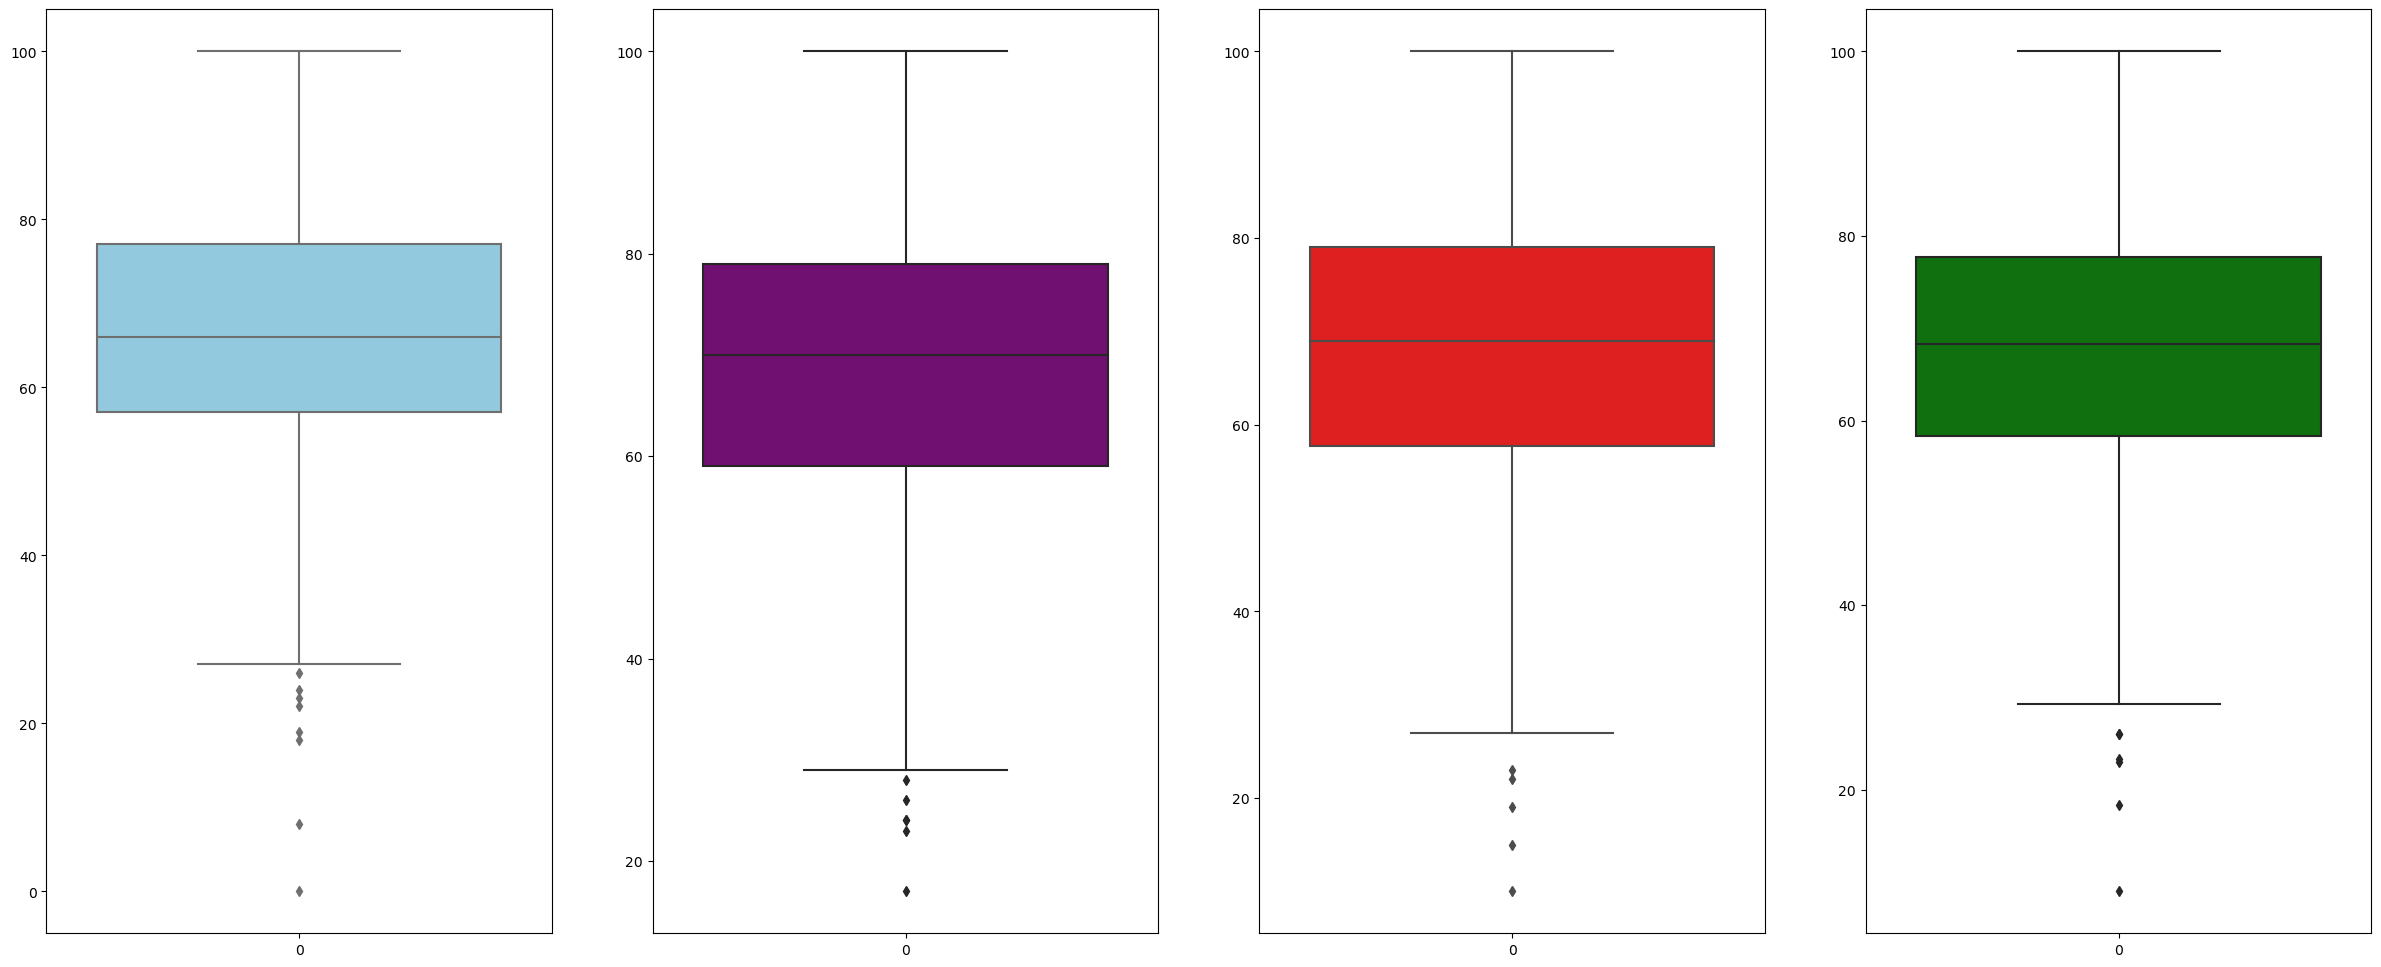

In [37]:
#outliers

plt.subplot(141)
sns.boxplot(df['math_score'], color = 'skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'], color = 'purple')
plt.subplot(143)
sns.boxplot(df['writing_score'], color = 'red')
plt.subplot(144)
sns.boxplot(df['average_score'], color = 'green')
plt.show()

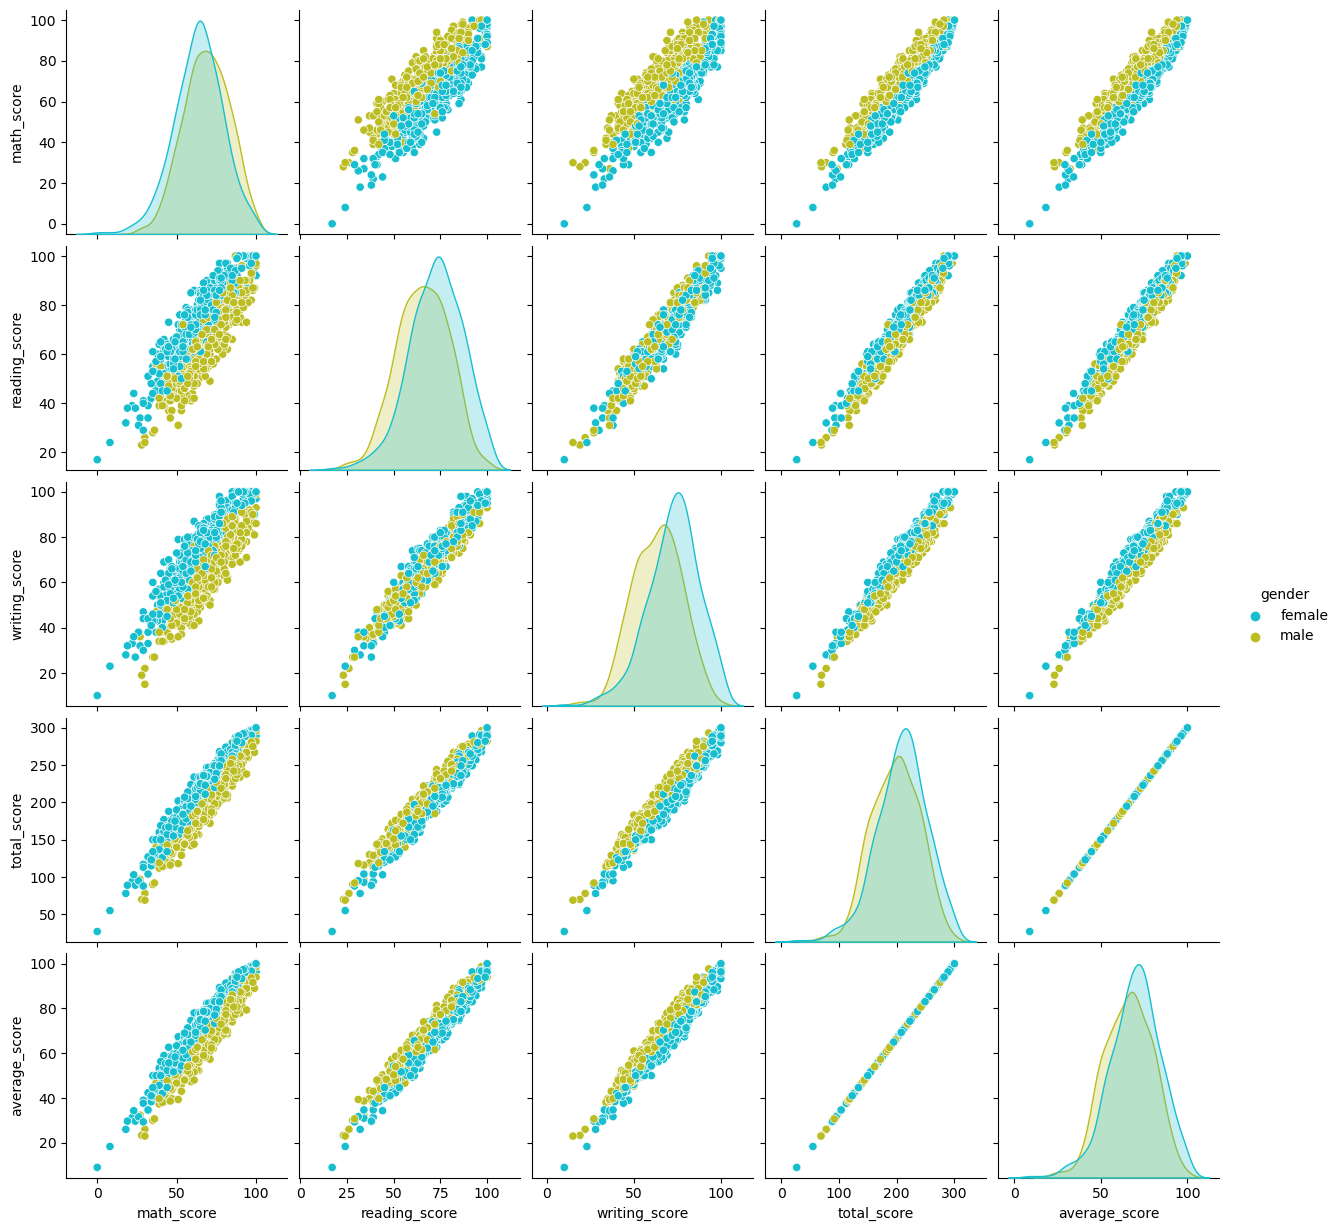

In [42]:
palette = {
    'male': '#bcbd22',   
    'female': '#17becf'  
}
sns.pairplot(df,hue = 'gender',palette=palette )
plt.show()

- From above plot it is clear that all the scores increase linearly with each other 

CONCLUSION

- Student's Performance is related with lunch , race, parental level education
- Female lead in pass percentage and also are top-scores
- Studdent's Performance is not much related with test preparation course
- Finishing preparation course is beneficial.